In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Setting up the working directory
import os

WORK_DIR = '/content/drive/MyDrive/WasAdvGAN/mnist'
os.chdir(WORK_DIR)
print(os.listdir('./'))

DATA_DIR = 'data'
os.makedirs(DATA_DIR, exist_ok=True)
print(os.listdir(DATA_DIR))

MODEL_DIR = 'saved_models'
os.makedirs(MODEL_DIR, exist_ok=True)
print(os.listdir(MODEL_DIR))

PLOT_DIR = 'plots'
os.makedirs(PLOT_DIR, exist_ok=True)
print(os.listdir(PLOT_DIR))

WAGAN_DIR = 'wagan'
os.makedirs(WAGAN_DIR, exist_ok=True)
print(os.listdir(WAGAN_DIR))

WAGAN_DATA_DIR = 'data/wagan'
os.makedirs(WAGAN_DATA_DIR, exist_ok=True)
print(os.listdir(WAGAN_DATA_DIR))

['models.py', 'data', '__pycache__', 'saved_models', 'plots', 'advgan', 'wagan', 'advgan.py', 'pipeline.py', 'wasserstein.py', 'AdvGAN.ipynb', 'wagan.py', 'WAGAN-beta_plus.ipynb', 'WAGAN-beta_zero.ipynb', 'WAGAN-beta_minus.ipynb', 'Training.ipynb']
['MNIST', 'advgan', 'wagan']
['model_original.pth', 'config_original.json', 'model_advgan_original.pth', 'config_advgan_original.json', 'model_wagan_beta_plus.pth', 'config_wagan_beta_plus.json', 'model_wagan_beta_zero.pth', 'config_wagan_beta_zero.json']
['training_error_original.png']
['beta_plus', 'beta_minus', 'beta_zero']
['adv_train_images_beta_plus.pickle', 'train_labels_beta_plus.pickle', 'adv_test_images_beta_plus.pickle', 'test_labels_beta_plus.pickle', 'adv_train_images_beta_zero.pickle', 'train_labels_beta_zero.pickle', 'adv_test_images_beta_zero.pickle', 'test_labels_beta_zero.pickle']


In [4]:
from tqdm.notebook import tqdm
import itertools
import math
import json
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

import torch.nn as nn
import torch
import numpy as np
import models
import torch.nn.functional as F
import torchvision
import torchvision.datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from pipeline import TargetModel_Pipeline
from wagan import WAGAN_Attack

In [5]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

## WAGAN adversarial attack

In [6]:
config = dict()
config['name'] = 'beta_minus'
config['model_num_labels'] = 10
config['image_nc'] = 1
config['box_min'] = 0
config['box_max'] = 1
config['trained_model'] = MODEL_DIR + '/model_original.pth'
config['adv_loss_fnc'] = 'c&w'
config['adv_lambda'] = 10
config['pert_lambda'] = -1
config['weights'] = 'init'
config['trained_gen_model'] = None
config['trained_gen_model'] = None
config['initial_lr'] = 0.001
config['cutoff_epochs1'] = 50
config['cutoff_lr1'] = 0.0001
config['cutoff_epochs2'] = 80
config['cutoff_lr2'] = 0.00001
config['batch_size'] = 128
config['num_epochs'] = 60

In [7]:
wagan = WAGAN_Attack(device, config)

In [8]:
mnist_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=False)
dataloader = DataLoader(mnist_dataset, batch_size=config['batch_size'], shuffle=True, num_workers=1)

In [9]:
# training the genereator and discriminator of the AdvGAN model
loss_D_epoch, loss_G_fake_epoch, loss_adv_epoch, loss_perturb_epoch, loss_W_epoch = wagan.fit(dataloader, config['num_epochs'], WAGAN_DIR)

  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1:
 loss_D: 0.252,
 loss_G_fake: 0.475,
 loss_adv: 24.110,
 loss_perturb: 15.407, 
 loss_wasserstien: 8906.726, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2:
 loss_D: 0.022,
 loss_G_fake: 0.838,
 loss_adv: 15.329,
 loss_perturb: 18.339, 
 loss_wasserstien: 9346.545, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3:
 loss_D: 0.009,
 loss_G_fake: 0.902,
 loss_adv: 14.426,
 loss_perturb: 19.714, 
 loss_wasserstien: 9341.588, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4:
 loss_D: 0.006,
 loss_G_fake: 0.921,
 loss_adv: 11.816,
 loss_perturb: 20.558, 
 loss_wasserstien: 9477.567, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 5:
 loss_D: 0.003,
 loss_G_fake: 0.946,
 loss_adv: 7.590,
 loss_perturb: 21.077, 
 loss_wasserstien: 9514.792, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 6:
 loss_D: 0.002,
 loss_G_fake: 0.957,
 loss_adv: 6.123,
 loss_perturb: 21.652, 
 loss_wasserstien: 9413.445, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 7:
 loss_D: 0.003,
 loss_G_fake: 0.959,
 loss_adv: 5.028,
 loss_perturb: 21.953, 
 loss_wasserstien: 9425.412, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 8:
 loss_D: 0.001,
 loss_G_fake: 0.968,
 loss_adv: 4.401,
 loss_perturb: 22.479, 
 loss_wasserstien: 9370.025, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 9:
 loss_D: 0.001,
 loss_G_fake: 0.978,
 loss_adv: 3.744,
 loss_perturb: 22.967, 
 loss_wasserstien: 9338.926, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 10:
 loss_D: 0.001,
 loss_G_fake: 0.977,
 loss_adv: 3.621,
 loss_perturb: 23.289, 
 loss_wasserstien: 9388.043, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 11:
 loss_D: 0.002,
 loss_G_fake: 0.975,
 loss_adv: 3.114,
 loss_perturb: 23.558, 
 loss_wasserstien: 9481.486, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 12:
 loss_D: 0.000,
 loss_G_fake: 0.985,
 loss_adv: 3.027,
 loss_perturb: 23.898, 
 loss_wasserstien: 9481.933, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 13:
 loss_D: 0.000,
 loss_G_fake: 0.988,
 loss_adv: 2.465,
 loss_perturb: 24.157, 
 loss_wasserstien: 9428.816, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 14:
 loss_D: 0.001,
 loss_G_fake: 0.988,
 loss_adv: 2.747,
 loss_perturb: 24.257, 
 loss_wasserstien: 9503.948, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 15:
 loss_D: 0.001,
 loss_G_fake: 0.983,
 loss_adv: 2.757,
 loss_perturb: 24.343, 
 loss_wasserstien: 9504.780, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 16:
 loss_D: 0.000,
 loss_G_fake: 0.989,
 loss_adv: 2.543,
 loss_perturb: 24.703, 
 loss_wasserstien: 9505.902, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 17:
 loss_D: 0.000,
 loss_G_fake: 0.990,
 loss_adv: 3.372,
 loss_perturb: 24.744, 
 loss_wasserstien: 9373.735, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 18:
 loss_D: 0.000,
 loss_G_fake: 0.991,
 loss_adv: 2.675,
 loss_perturb: 24.908, 
 loss_wasserstien: 9435.966, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 19:
 loss_D: 0.000,
 loss_G_fake: 0.990,
 loss_adv: 2.582,
 loss_perturb: 25.194, 
 loss_wasserstien: 9284.573, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 20:
 loss_D: 0.000,
 loss_G_fake: 0.994,
 loss_adv: 2.306,
 loss_perturb: 25.342, 
 loss_wasserstien: 9354.738, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 21:
 loss_D: 0.002,
 loss_G_fake: 0.985,
 loss_adv: 2.196,
 loss_perturb: 25.418, 
 loss_wasserstien: 9408.281, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 22:
 loss_D: 0.000,
 loss_G_fake: 0.993,
 loss_adv: 2.124,
 loss_perturb: 25.607, 
 loss_wasserstien: 9361.980, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 23:
 loss_D: 0.000,
 loss_G_fake: 0.994,
 loss_adv: 2.172,
 loss_perturb: 25.626, 
 loss_wasserstien: 9324.861, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 24:
 loss_D: 0.000,
 loss_G_fake: 0.995,
 loss_adv: 2.279,
 loss_perturb: 25.674, 
 loss_wasserstien: 9351.922, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 25:
 loss_D: 0.000,
 loss_G_fake: 0.994,
 loss_adv: 1.806,
 loss_perturb: 25.810, 
 loss_wasserstien: 9315.252, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 26:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 1.862,
 loss_perturb: 25.821, 
 loss_wasserstien: 9120.052, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 27:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 1.858,
 loss_perturb: 25.924, 
 loss_wasserstien: 9198.686, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 28:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 1.795,
 loss_perturb: 25.943, 
 loss_wasserstien: 9333.323, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 29:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 1.594,
 loss_perturb: 26.011, 
 loss_wasserstien: 9298.266, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 30:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 1.619,
 loss_perturb: 26.150, 
 loss_wasserstien: 9272.608, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 31:
 loss_D: 0.001,
 loss_G_fake: 0.993,
 loss_adv: 1.581,
 loss_perturb: 26.119, 
 loss_wasserstien: 9260.031, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 32:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 1.545,
 loss_perturb: 26.150, 
 loss_wasserstien: 9167.689, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 33:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 1.892,
 loss_perturb: 26.087, 
 loss_wasserstien: 9163.751, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 34:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 1.731,
 loss_perturb: 26.161, 
 loss_wasserstien: 9288.127, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 35:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 1.465,
 loss_perturb: 26.216, 
 loss_wasserstien: 9318.940, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 36:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 1.512,
 loss_perturb: 26.246, 
 loss_wasserstien: 9226.397, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 37:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 1.428,
 loss_perturb: 26.281, 
 loss_wasserstien: 9297.515, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 38:
 loss_D: 0.001,
 loss_G_fake: 0.994,
 loss_adv: 1.551,
 loss_perturb: 26.360, 
 loss_wasserstien: 9260.304, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 39:
 loss_D: 0.000,
 loss_G_fake: 0.994,
 loss_adv: 1.658,
 loss_perturb: 26.355, 
 loss_wasserstien: 9288.846, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 40:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 1.500,
 loss_perturb: 26.442, 
 loss_wasserstien: 9235.188, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 41:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 1.505,
 loss_perturb: 26.432, 
 loss_wasserstien: 9164.868, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 42:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 1.881,
 loss_perturb: 26.345, 
 loss_wasserstien: 9297.934, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 43:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 1.434,
 loss_perturb: 26.425, 
 loss_wasserstien: 9420.870, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 44:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 1.223,
 loss_perturb: 26.413, 
 loss_wasserstien: 9375.793, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 45:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 1.396,
 loss_perturb: 26.440, 
 loss_wasserstien: 9368.820, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 46:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 1.394,
 loss_perturb: 26.531, 
 loss_wasserstien: 9380.918, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 47:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 1.495,
 loss_perturb: 26.545, 
 loss_wasserstien: 9311.247, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 48:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 1.276,
 loss_perturb: 26.612, 
 loss_wasserstien: 9300.831, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 49:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 1.283,
 loss_perturb: 26.642, 
 loss_wasserstien: 9395.045, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 50:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 1.077,
 loss_perturb: 26.657, 
 loss_wasserstien: 9342.893, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 51:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 0.941,
 loss_perturb: 26.668, 
 loss_wasserstien: 9338.053, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 52:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.817,
 loss_perturb: 26.682, 
 loss_wasserstien: 9337.011, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 53:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.776,
 loss_perturb: 26.694, 
 loss_wasserstien: 9337.605, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 54:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.738,
 loss_perturb: 26.691, 
 loss_wasserstien: 9349.460, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 55:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.658,
 loss_perturb: 26.690, 
 loss_wasserstien: 9365.898, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 56:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.648,
 loss_perturb: 26.698, 
 loss_wasserstien: 9362.018, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 57:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.611,
 loss_perturb: 26.706, 
 loss_wasserstien: 9368.063, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 58:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.581,
 loss_perturb: 26.714, 
 loss_wasserstien: 9362.767, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 59:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.607,
 loss_perturb: 26.725, 
 loss_wasserstien: 9370.922, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 60:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.607,
 loss_perturb: 26.733, 
 loss_wasserstien: 9375.338, 



## New Accuracies

In [10]:
# calculate accuracy on the adversarial dataset
# accuracy on the new adversarial training images
mnist_train_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=True)
train_dataloader = DataLoader(mnist_train_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

num_correct_orig, num_correct_adv = wagan.calc_adverserial_acc(train_dataloader)
print(num_correct_orig, num_correct_adv, len(mnist_train_dataset))
print(num_correct_orig/len(mnist_train_dataset), num_correct_adv/len(mnist_train_dataset))

  0%|          | 0/469 [00:00<?, ?it/s]

59976 405 60000
0.9996 0.00675


In [11]:
# calculate accuracy on the adversarial dataset
# accuracy on the new adversarial testing images
mnist_test_dataset = torchvision.datasets.MNIST(DATA_DIR, train=False, transform=transforms.ToTensor(), download=True)
test_dataloader = DataLoader(mnist_test_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

num_correct_orig, num_correct_adv = wagan.calc_adverserial_acc(test_dataloader)
print(num_correct_orig, num_correct_adv, len(mnist_test_dataset))
print(num_correct_orig/len(mnist_test_dataset), num_correct_adv/len(mnist_test_dataset))

  0%|          | 0/79 [00:00<?, ?it/s]

9931 68 10000
0.9931 0.0068


### Store adverserial train and test images

In [12]:
mnist_train_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=True)
train_dataloader = DataLoader(mnist_train_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

adv_images_list = []
real_labels_list = []

for images, labels in tqdm(dataloader):
  images, labels = images.to(wagan.device), labels.to(wagan.device)
  # Generate adverserial images
  adv_images = wagan.generate_adverserial_images(images).to(wagan.device)
  adv_images_list.append(adv_images)
  real_labels_list.append(labels)

adv_images = torch.cat(adv_images_list, dim=0)
real_labels = torch.cat(real_labels_list, dim=0)
print(adv_images.shape)
print(real_labels.shape)

with open(WAGAN_DATA_DIR + '/adv_train_images_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(adv_images, handle)

with open(WAGAN_DATA_DIR + '/train_labels_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(real_labels, handle)

  0%|          | 0/469 [00:00<?, ?it/s]

torch.Size([60000, 1, 28, 28])
torch.Size([60000])


In [13]:
mnist_test_dataset = torchvision.datasets.MNIST(DATA_DIR, train=False, transform=transforms.ToTensor(), download=True)
test_dataloader = DataLoader(mnist_test_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

adv_images_list = []
real_labels_list = []

for images, labels in tqdm(test_dataloader):
  images, labels = images.to(wagan.device), labels.to(wagan.device)
  # Generate adverserial images
  adv_images = wagan.generate_adverserial_images(images).to(wagan.device)
  adv_images_list.append(adv_images)
  real_labels_list.append(labels)

adv_images = torch.cat(adv_images_list, dim=0)
real_labels = torch.cat(real_labels_list, dim=0)
print(adv_images.shape)
print(real_labels.shape)

with open(WAGAN_DATA_DIR + '/adv_test_images_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(adv_images, handle)

with open(WAGAN_DATA_DIR + '/test_labels_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(real_labels, handle)

  0%|          | 0/79 [00:00<?, ?it/s]

torch.Size([10000, 1, 28, 28])
torch.Size([10000])


### Examples of Adverserially created images

In [14]:
mnist_train_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=True)
train_dataloader = DataLoader(mnist_train_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

images_ex = None
adverserial_images_ex = None

for images, labels in train_dataloader:
  images, labels = images.to(wagan.device), labels.to(wagan.device)
  # Generate adverserial images
  adv_images = wagan.generate_adverserial_images(images).to(wagan.device)
  images_ex = images.detach().clone()
  adverserial_images_ex = adv_images.detach().clone()
  print(images_ex.shape)
  print(adverserial_images_ex.shape)
  break

torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])


In [15]:
index = 100
image = torch.squeeze(images_ex[index])
adversary = torch.squeeze(adverserial_images_ex[index])
print(image.shape, adversary.shape)
# Lp distance between the two images
Lp_distance = (image - adversary).pow(2).sum().item()
print(math.sqrt(Lp_distance))

torch.Size([28, 28]) torch.Size([28, 28])
5.143140368761405


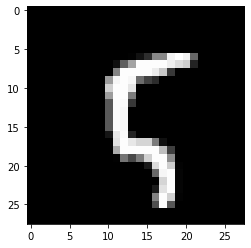

In [16]:
plt.imshow(image.cpu().numpy().squeeze(), cmap='gray')
plt.show()

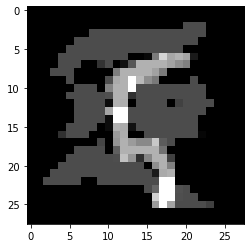

In [17]:
plt.imshow(adversary.cpu().numpy().squeeze(), cmap='gray')
plt.show()